In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
#Pre-peocessing dataSet
#import data
train_data = pd.read_csv("Ecommerce Customers.csv")
#Print some of the data
train_data.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
train_data.describe()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
#check null values
train_data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [ ]:
#rename the columns names
train_data.rename(columns={'Avg. Session Length':'Avg_Session_Length', 'Time on App':'Time_on_App','Time on Website':'Time_on_Website','Length of Membership':'Length_of_Membership','Yearly Amount Spent':'Yearly_Amount_Spent'},inplace=1)
train_data.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
#remove Unnecessary columns 
train_data.drop(['Address','Avatar'],axis=1,inplace=True)

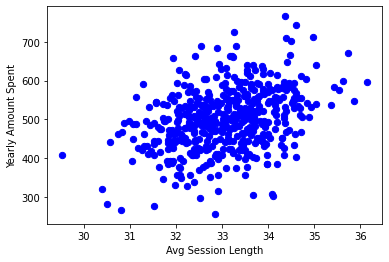

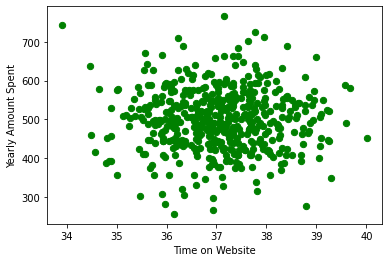

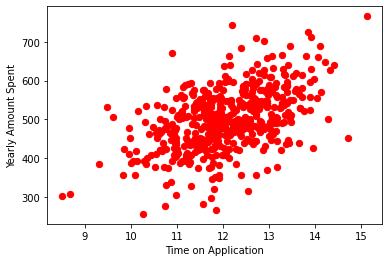

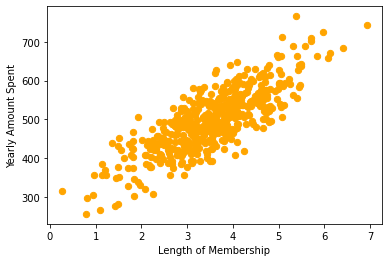

In [ ]:
#check if a feature has a relation with the output
plt.scatter(train_data.Avg_Session_Length,train_data.Yearly_Amount_Spent,color='b',s=40)
plt.x = train_data.Avg_Session_Length
plt.y = train_data.Yearly_Amount_Spent
plt.xlabel('Avg Session Length') 
plt.ylabel('Yearly Amount Spent') 
plt.show()

plt.scatter (train_data.Time_on_Website,train_data.Yearly_Amount_Spent,color='g',s=40)
plt.x = train_data.Time_on_Website
plt.y = train_data.Yearly_Amount_Spent
plt.xlabel('Time on Website') 
plt.ylabel('Yearly Amount Spent') 
plt.show()

plt.scatter(train_data.Time_on_App,train_data.Yearly_Amount_Spent,color='r',s=40)
plt.x = train_data.Time_on_App
plt.y = train_data.Yearly_Amount_Spent
plt.xlabel('Time on Application') 
plt.ylabel('Yearly Amount Spent') 
plt.show()

plt.scatter(train_data.Length_of_Membership,train_data.Yearly_Amount_Spent,color='orange',s=40)
plt.x = train_data.Length_of_Membership
plt.y = train_data.Yearly_Amount_Spent
plt.xlabel('Length of Membership') 
plt.ylabel('Yearly Amount Spent')
plt.show()

In [ ]:
#Choose X and y values
X = np.array(train_data['Length_of_Membership'])
#round the values 
for i in range(len(X)):
  X[i] = round(X[i],5)

y = np.array(train_data['Yearly_Amount_Spent'])
#round the values 
for i in range(len(y)):
  y[i] = round(y[i],5)
  
#Split train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
#calculating the gradient Descent  with on feature
n = len(X_train)
theta_0 = 0
theta_1 = 0
L = 0.01 #learning rate
itr = 1000 # number of itrations

#to draw the gradient line
cost_history = [0]
t0_history = [0]
t1_history = [0] 
summation = 0.0

for i in range(itr):
  Y_pred = theta_0 + theta_1 * X_train 
  D_theta_1 = (-2/n) * sum(X_train * (y_train - Y_pred))  # Derivative wrt m
  D_thete_0 = (-2/n) * sum(y_train - Y_pred)  # Derivative wrt c
  theta_1 = theta_1 - L * D_theta_1  # Update theta_1
  theta_0 = theta_0 - L * D_thete_0  # Update theta_0
  t0_history.append(theta_0)
  t1_history.append(theta_1)  

  for i in range (n):
    #calculate cost function J(0) = 1/2n sum(Y_pred - Y)^2
    summation = 1/n * np.sum(((theta_1 * X_train[i] + theta_0) - y_train[i])**2)
  cost_history.append(summation)

print(theta_0,theta_1)


213.32073550224462 79.55191826265055


4.636144217437508


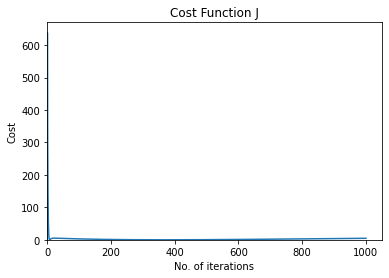

In [ ]:
print(cost_history[-1])
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_history)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

Text(0, 0.5, 'Yearly Amount Spent')

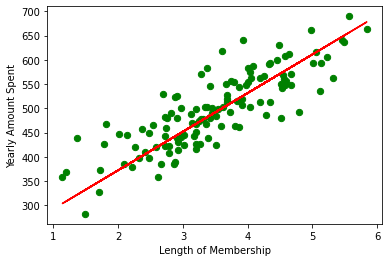

In [ ]:
#predecting y_test valuse using this formula (210.5236 + 80.9406 * X_test)
y_test_pred = []
for i in range(len(X_test)):
  y_test_pred.append(theta_0 + theta_1 * X_test[i])
#conver it to np array
y_test_pred = np.array(y_test_pred)

#draw y real values and predicted values
plt.scatter(X_test, y_test,color='g',marker="o", s=40, )
plt.plot(X_test, y_test_pred, color='r')
plt.xlabel('Length of Membership') 
plt.ylabel('Yearly Amount Spent')


In [ ]:
#Evaluate the model
#Mean Absolute Error (MAE)
m = len(y_test)
MAE = 1/m * np.sum(np.absolute(y_test - y_test_pred))
print("Mean Absolute Error: ", MAE)
#MEAN SQUARED ERROR (MSE)
MSE = 1/m * np.sum((y_test - y_test_pred)**2)
print("MEAN SQUARED ERROR: ",MSE)
#ROOT MEAN SQUARED ERROR (RMSE)
RMSE = np.sqrt(1/m * np.sum((y_test - y_test_pred)*(y_test - y_test_pred)))
print("ROOT MEAN SQUARED ERROR: " , RMSE)
#R-SQUARED SCORE
y_bar = y_test.mean()
ss_tot = np.sum((y_test - y_bar)**2)
ss_res = np.sum((y_test - y_test_pred)**2)
R_SS = 1 - (ss_res/ss_tot)
print("R-SQUARED SCORE: ",R_SS*100,'%')

#ADJUSTED R-SQUARED SCORE
Adj_Rss = 1 - ((1 - R_SS)*(m - 1) / (m - 1 - 1))
print("ADJUSTED R-SQUARED SCORE: ",Adj_Rss*100,'%')

Mean Absolute Error:  35.57988930412075
MEAN SQUARED ERROR:  2080.4387379577092
ROOT MEAN SQUARED ERROR:  45.61182673340007
R-SQUARED SCORE:  65.13903343095917 %
ADJUSTED R-SQUARED SCORE:  64.85561093852795 %


Mean Absolute Error:  34.390927132296476
MEAN SQUARED ERROR:  1847.1595029463256
ROOT MEAN SQUARED ERROR:  42.97859354313872
R-SQUARED SCORE:  69.047987568665 %
ADJUSTED R-SQUARED SCORE:  68.79634519117445 %
[[63.83471162]]
Variance score: 0.6433052299910738


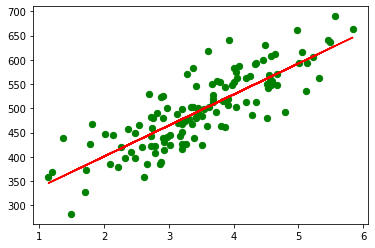

In [ ]:
from sklearn import datasets, linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
regr.fit(X_train, y_train)

Y_pred_3 = regr.predict(X_test.reshape(-1,1))

#draw Y real values and predicted values
plt.scatter(X_test, y_test,color='g',marker="o", s=40)
plt.plot(X_test, Y_pred_3, color='r')
#Model Evaluation 
from sklearn import metrics
#Mean Absolute Error (MAE)
m_MAE = metrics.mean_absolute_error(y_test, Y_pred_3)
print("Mean Absolute Error: ", m_MAE)
#MEAN SQUARED ERROR (MSE)
m_MSE = metrics.mean_squared_error(y_test, Y_pred_3)
print("MEAN SQUARED ERROR: ", m_MSE)
#ROOT MEAN SQUARED ERROR (RMSE)
m_RMSE = np.sqrt(metrics.mean_squared_error(y_test,Y_pred_3))
print("ROOT MEAN SQUARED ERROR: ", m_RMSE)
#R-SQUARED SCORE
m_r2 = metrics.r2_score(y_test,Y_pred_3)
print("R-SQUARED SCORE: ", m_r2 * 100 ,'%')
#ADJUSTED R-SQUARED SCORE
m_adj_r2 = 1 - ((1 - m_r2)*(m - 1) / (m - 1 - 1))
print("ADJUSTED R-SQUARED SCORE: ", m_adj_r2*100, '%')
print(regr.coef_)
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(regr.score(X_train, y_train))) 


In [ ]:
#Regualrization Implementation

from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.01, normalize=True)
ridgereg.fit(X_train, y_train)

reg_y_pred = ridgereg.predict(X_test.reshape(-1, 1))


#Mean Absolute Error (MAE)
m_MAE = metrics.mean_absolute_error(y_test, reg_y_pred)
print("Mean Absolute Error: ", m_MAE)
#MEAN SQUARED ERROR (MSE)
m_MSE = metrics.mean_squared_error(y_test, reg_y_pred)
print("MEAN SQUARED ERROR: ", m_MSE)
#ROOT MEAN SQUARED ERROR (RMSE)
m_RMSE = np.sqrt(metrics.mean_squared_error(y_test,reg_y_pred))
print("ROOT MEAN SQUARED ERROR: ", m_RMSE)
#R-SQUARED SCORE
m_r2 = metrics.r2_score(y_test,reg_y_pred)
print("R-SQUARED SCORE: ", m_r2 * 100 ,'%')
#ADJUSTED R-SQUARED SCORE
m_adj_r2 = 1 - ((1 - m_r2)*(m - 1) / (m - 1 - 1))
print("ADJUSTED R-SQUARED SCORE: ", m_adj_r2*100, '%')

Mean Absolute Error:  34.42089247028893
MEAN SQUARED ERROR:  1849.4409533498422
ROOT MEAN SQUARED ERROR:  43.00512705887336
R-SQUARED SCORE:  69.00975834095699 %
ADJUSTED R-SQUARED SCORE:  68.75780515673713 %


In [ ]:
# Decision Tree Regression 
from sklearn.tree import DecisionTreeRegressor  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 
# predict y values
y_pred = regressor.predict(X_test.reshape(-1,1)) 

#Mean Absolute Error (MAE)
m_MAE = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", m_MAE)
#MEAN SQUARED ERROR (MSE)
m_MSE = metrics.mean_squared_error(y_test, y_pred)
print("MEAN SQUARED ERROR: ", m_MSE)
#ROOT MEAN SQUARED ERROR (RMSE)
m_RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("ROOT MEAN SQUARED ERROR: ", m_RMSE)
#R-SQUARED SCORE
m_r2 = metrics.r2_score(y_test,y_pred)
print("R-SQUARED SCORE: ", m_r2 * 100 ,'%')
#ADJUSTED R-SQUARED SCORE
m_adj_r2 = 1 - ((1 - m_r2)*(m - 1) / (m - 1 - 1))
print("ADJUSTED R-SQUARED SCORE: ", m_adj_r2*100, '%')

Mean Absolute Error:  49.17519088
MEAN SQUARED ERROR:  3830.394995094776
ROOT MEAN SQUARED ERROR:  61.89018496575023
R-SQUARED SCORE:  35.815811619955184 %
ADJUSTED R-SQUARED SCORE:  35.29398895019873 %


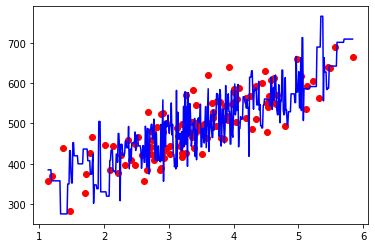

In [ ]:
X_grid = np.arange(min(X_test), max(X_test), 0.01) 
  
# reshape for reshaping the data into  
# a len(X_grid)*1 array, i.e. to make 
# a column out of the X_grid values 
X_grid = X_grid.reshape((len(X_grid), 1))  
  
# scatter plot for original data 
plt.scatter(X_test, y_test, color = 'red') 
  
# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')  